# Wrangle and Analyze Data, By : Najlaa Shariefi

In [1]:
import pandas as pd 
import numpy as np
import requests 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Gather

In [2]:
# reading the provided twitter-archive-enhanced file (file on hand) and saving it to a DataFrame
twitter_arch = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# checking the content of the recently created dataframe
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# downoloading image-predictions file using the given url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save .tsv to file
with open("image-predictions.tsv", mode = 'wb') as file :
    file.write(response.content)
    

In [5]:
# reading image-predictions file and saving it as a DataFrame 
img_predict = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
#checking the content of the recently created dataframe
img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### I applied for Twitter Developer Acoount , but unfortunately my application was NOT APPROVED 

* The following code is the Twitter API code to gather some of the required data for the project. This code was provided by Udacity and will fail to run succeesuly since I don't have an actual Twitter Developer Account. 

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### However, the data supposed to be gathered using the above code ,  is provided for download on Udacity's ClassRoom .
* The following code is intended to read the previously mentioned .txt file   

In [7]:
# read JSON content as Pandas DataFrame
tweet_json = pd.read_json('tweet_json.txt', lines= True, encoding = 'utf-8')

In [8]:
# select specific columns to keep in the data frame
tweet_json = tweet_json.loc[:, ['id','favorite_count','retweet_count']]

In [9]:
# checking the structure of the resulted DataFrame
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


## Assess

In [10]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [13]:
#returning a random sample of 20 rows from the table 
twitter_arch.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
808,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
1466,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://vine.co/v/iJWKejYdLlh,11,10,None,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
628,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
1129,729463711119904772,NaN,NaN,2016-05-09 00:11:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pupcasso. You can't afford his art. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729463711...,13,10,Pupcasso,None,None,None,None
319,834477809192075265,NaN,NaN,2017-02-22 18:59:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leo. He was a skater pu...,8.295020e+17,4.196984e+09,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None


In [14]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# generates descriptive stats for the rating_numerator column
twitter_arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
# sort the values of the rating_numerator column descending  
twitter_arch.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [17]:
# checking the value count of rating_numerator column 
twitter_arch.rating_numerator.value_counts(ascending = True)

204       1
121       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
143       1
182       1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
26        1
24        1
20        1
80        1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [18]:
# generates descriptive stats for the rating_denominator column
twitter_arch.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [19]:
# sort the values of the rating_denominator column descending  
twitter_arch.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [20]:
# checking the records where the rating_denominator is 0 
twitter_arch[twitter_arch.rating_denominator == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
# checking the value counts of denomerator column 
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
# returning all the rows that has null value in expanded_urls column
twitter_arch[twitter_arch.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [23]:
# checking for number of null value in 
sum(twitter_arch.retweeted_status_id.isnull())

2175

In [24]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# checking the existance of dupliacted values in tweet_id column
img_predict[img_predict.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [27]:
tweet_json.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [28]:
tweet_json.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [29]:
# checking the existance of dupliacted values in id column
tweet_json[tweet_json.id.duplicated()]

,id,favorite_count,retweet_count


In [30]:
# checking the unique values of the source colummn
twitter_arch.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

#### Quality

##### twitter_arch
- Missing values in most of the cells of the `in_reply_to_status_id` and `in_reply_to_user_id` columns (78 instead of 2356).
- Missing values in most of the cells of `retweeted_status_id`,`retweeted_status_user_id` and `retweeted_status_timestamp` columns (181 instead of 2356).
- We are ONLY interested in ((ORIGINAL)) tweets of DOG ratings i.e. we don't want any retweet or reply tweet to an original tweet.
- We are ONLY interested in ORIGINAL tweets of DOG ratings ((that have images)) i.e.  we don't want any tweet without an image/images. 
- Erroneous datatypes (`timestamp` and `retweeted_status_timestamp`).
- Object is a better datatype for `tweet_id` column.
- All cells that belongs to `rating_denominator` column should have the value of 10.
- Inaccurate values in the `rating_numerator` column i.e. some ratings are not out of a rating_denominator 10.
- Misrepresenting the null values in columns (`doggo`,`floofer`,`pupper`,`puppo`)  i.e. Nulls represented as "None".
- Content of the `source` column is too long and can not be analyzed easily.
- Irregular and illogical values in the`name` column.
- Some entries in the `name` column are in lowercase.
- Misrepresenting the null values in the `name` i.e. Nulls represented as "None".
- Undescriptive label for the `name` column.
- `rating_numerator` for the `tweet_id` = 786709082849828864 is 9.75 instead of 75


##### img_predict
- "True" and "False" values in the (`p1_dog`, `p2_dog`, `p3_dog`) columns are not that much handy in the analysis.
- Some images are not for dogs while we are ONLY interested in "dogs" ratings.
- Object data type is a better datatype  choice for `tweet_id` column.
- Undescriptive columns' labels (`p1`,`p2`,`p3`,`p1_conf`,`p2_conf`,`p3_conf`,`p1_dog`,`p2_dog`,`p3_dog`).

##### tweet_json
- `tweet_id` as a column label instead of `id`.
- Object data type is a better datatype  choice for `id` column.

#### Tidiness
- The values of four columns (`doggo`,`floofer`,`pupper`,`puppo`) in `twitter_arch` table should be represented in one column `dog_stage` with a `category` datatype.
- `tweet_json` and `img-predict` tables need to be part of our main dataset `twitter_arch`.
- `rating_numerator` and `rating_denominator` columns in `twitter_arch` table should form one column `rating_out_of_10`.

## Clean

In [31]:
twitter_arch_clean = twitter_arch.copy()
img_predict_clean = img_predict.copy()
tweet_json_clean = tweet_json.copy()

### Missing Data

#### `twitter_arch`:
- #### Missing values in most of the cells of the `in_reply_to_status_id` and `in_reply_to_user_id` columns (78 instead of 2356) 
- #### Missing values in most of the cells of `retweeted_status_id`,`retweeted_status_user_id` and `retweeted_status_timestamp` columns (181 instead of 2356)
- #### We are ONLY interested in ORIGINAL tweets ratings i.e. we don't want any retweet or a reply tweet to an original tweet

##### To clean Missing Data Isssues we need to solve the third issue ,first,  We are ONLY interested in ORIGINAL tweets ratings i.e. we don't want any retweet or a reply tweet to an original tweet

#### Define

* Keep only the records in `twitter_arch` table that have null values in the `retweeted_status_id` column since the records with non null values in this column are also having non null values in the `retweeted_status_user_id` and `retweeted_status_timestamp` columns.  i.e. the records that will be kept are the ones that are not associated with retweets.

* Keep only the records in `twitter_arch` table that have null values in the `in_reply_to_status_id` since the records with non null values in this column are also having non null values in the `in_reply_to_user_id` column.  i.e. the records that will be kept are the ones that are not associated with reply to an original tweet.

* Drop the (`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp``in_reply_to_status_id` and `in_reply_to_user_id`) columns that had previously some MISSING DATA since they don't have any data now.

#### Code

In [32]:
# Keep only the records in twitter_arch table that have null values in the `retweeted_status_id` column
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_id.isnull()]

#Keep only the records in twitter_arch table that have null values in the `in_reply_to_status_id` column
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.isnull()]

#dropping `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` 
#and `retweeted_status_timestamp` columns 
twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 
                                              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [33]:
# checking the dimensions of the dataframe
twitter_arch_clean.shape

(2097, 12)

In [34]:
#checking that columns were successfully dropped from the data frame
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [35]:
twitter_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness 

#### `twitter_arch`:
- #### The values of four columns (`doggo`,`floofer`,`pupper`,`puppo`)  should be represented in one new column `dog_stage` with a `category` datatype 
- #### Misrepresenting the null values in (`doggo`,`floofer`,`pupper`,`puppo`) columns  i.e. Nulls represented as None 

#### Define
* Get the indexes of the  (`doggo`,`puppo`) columns
* Replace "None" with np.nan in columns (`doggo`,`floofer`,`pupper`,`puppo`) 
* Create a new column "dog_stage" and assign it the values ogf the four columns by calling `apply` ,passing `axis` to `apply` row-wise , then converting the datatype to `str`and `join`
* Change the  datatype of the `dog_stage` column to "category" datatype
* Drop (`doggo`,`floofer`,`pupper`,`puppo`) columns

#### Code 

In [36]:
# get the index of `doggo` column
twitter_arch_clean.columns.get_loc('doggo')

8

In [37]:
# get the index of `puppo` column
twitter_arch_clean.columns.get_loc('puppo')

11

In [38]:
#replacing "None" with np.nan
twitter_arch_clean['doggo'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_arch_clean['floofer'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_arch_clean['pupper'].replace(to_replace = 'None', value = np.nan, inplace= True)
twitter_arch_clean['puppo'].replace(to_replace = 'None', value = np.nan, inplace= True)

# create a new column "dog_stage" and assign it the values of the four columns
twitter_arch_clean['dog_stage'] = twitter_arch_clean[twitter_arch_clean.columns[8:12]].apply(lambda x: ','.join(x.dropna().astype(str)),axis = 1)


# change thedatatype of the `dog_stage` column to "category" datatype
twitter_arch_clean['dog_stage'] = twitter_arch_clean['dog_stage'].astype('category')

# dropping the four columns
twitter_arch_clean = twitter_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [39]:
#checking the datatype of dog_stage column and confirming that the four column have been successfully dropped
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.9+ KB


In [40]:
twitter_arch_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1559,688547210804498433,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,
642,793210959003287553,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,
1074,739844404073074688,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,
1548,689275259254616065,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,
2280,667393430834667520,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,
929,754482103782404096,2016-07-17 01:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,
1996,672591762242805761,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,
1632,684460069371654144,2016-01-05 19:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,https://twitter.com/dog_rates/status/684460069...,10,10,Jeph,
1370,702321140488925184,2016-02-24 02:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,None,
921,756288534030475264,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,https://twitter.com/dog_rates/status/756288534...,12,10,None,


- #### `tweet_json` table needs to be  a part of our main dataset `twitter_arch` 
- #### `tweet_json`: "tweet_id" as a column label instead of `id` in `tweet_json` table , and the  "Object" datatype is a better datatype choice for `tweet_id` column in `twitter_arch` and `id` column in  `tweet_json` table 

#### Define
- Change the datatype of `tweet_id` column in `twitter_arch` table to string(object) datatype
- Change the datatype of `id` column in `tweet_json` table to string(object) datatype
- Rename `id` column to "tweet_id" in `tweet_json` table
- Merge `twitter_arch` and `tweet_json` tables

#### Code

In [41]:
#change the datatype of `tweet_id` column in `twitter_arch` table
twitter_arch_clean['tweet_id'] = twitter_arch_clean['tweet_id'].astype('object')
tweet_json_clean['id'] = tweet_json_clean['id'].astype('object')

#rename `id` column to "tweet_id" 
tweet_json_clean.columns = ['tweet_id','favorite_count','retweet_count']

In [42]:
#merge `twitter_arch` and `tweet_json` tables 
twitter_arch_clean = pd.merge(twitter_arch_clean, tweet_json_clean,
                       on='tweet_id', how='left')

#### Test

In [43]:
#checking the new datatype of `tweet_id` column and confirming that the merge has been successfuly done 
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
favorite_count        2097 non-null int64
retweet_count         2097 non-null int64
dtypes: category(1), int64(4), object(6)
memory usage: 182.6+ KB


- ####  `img_predict` table needs to be  a part of our main dataset `twitter_arch`
- #### `twitter_arch` : We are ONLY interested in ORIGINAL tweets of DOG ratings ((that have images)) i.e.  we don't want any tweet without an image/images. 

#### Define
- Merge the `img_predict` table with our main dataset `twitter_arch` to form a Master Dataset `master_dataset`
- In the resulting Master Dataset, ONLY keep the records that has an image by dropping all the records that has null values in the `jpg_url` column since this will indicate that this tweet has NO image.

#### Code

In [44]:
# merge the `img_predict` table with our main dataset `twitter_arch` to form a Master Dataset `master_dataset`
master_dataset = pd.merge(twitter_arch_clean, img_predict_clean,
                       on='tweet_id', how='inner')

#### Test

In [45]:
# confirming that the merge was successfully done
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null category
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null fl

In [46]:
# confirming that all the reocrds remaining in the `master_dataset` have images by trying to recall the records with
# a null value in the `jpg_url` column
# Note : There should be no records to be displayed 
master_dataset[master_dataset.jpg_url.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


- #### `rating_numerator` for the `tweet_id` = 786709082849828864 is 9.75 instead of 75
- #### Inaccurate values in the `rating_numerator` column i.e. some ratings are not out of a rating_denominator 10 
- #### All cells that belongs to `rating_denominator` column should have the value of 10
- #### `rating_numerator` and `rating_denominator` columns in `twitter_arch` table should form one column `rating_out_of_10`
>  Note : the mentioned columns were located before within `twitter_arch` table

#### Define
- Replace the `rating_numerator` for the `tweet_id` = 786709082849828864  with  9.75 
- Unify all the`rating_numerator` values to be out of 10 (denominator) . This done by the following steps : 
    *  Dividing the `rating_numerator` value by the `rating_denominator` value
    *  Multiplying the result by 10 
    *  Round the Rating using .round() 
    *  changing the datatype of the `rating_numerator` column to int64(integer)
    
- Rename the `rating_numerator` column to "rating_out_of_10"    
- Drop the `rating_denominator` column 

#### Code

In [47]:
# replacing the `rating_numerator` for the `tweet_id` = 786709082849828864  with  9.75 
master_dataset['rating_numerator'].replace(to_replace = 75, value = 9.75, inplace= True)

In [48]:
# dividing the `rating_numerator` value by the `rating_denominator` value
master_dataset['rating_numerator'] = master_dataset['rating_numerator']/master_dataset['rating_denominator']

# multiplying the result by 10 
master_dataset['rating_numerator'] = master_dataset['rating_numerator'].mul(10)

In [49]:
# changing the datatype of the column to int64(integer)
master_dataset['rating_numerator'] = master_dataset['rating_numerator'].astype(int)

# rename the `rating_numerator` column to `rating_out_of_10`
master_dataset = master_dataset.rename(columns={"rating_numerator": "rating_out_of_10"}) 

# drop the rating_denominator column
master_dataset = master_dataset.drop('rating_denominator', axis = 1)

#### Test

In [50]:
# checking that the rating_out_of_10 for the `tweet_id` = 786709082849828864 is no longer = 75 , The result should be 0 rows
master_dataset[master_dataset['rating_out_of_10'] == 75]

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
# checking the name and position of the rationg column
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id            1971 non-null object
timestamp           1971 non-null object
source              1971 non-null object
text                1971 non-null object
expanded_urls       1971 non-null object
rating_out_of_10    1971 non-null int64
name                1971 non-null object
dog_stage           1971 non-null category
favorite_count      1971 non-null int64
retweet_count       1971 non-null int64
jpg_url             1971 non-null object
img_num             1971 non-null int64
p1                  1971 non-null object
p1_conf             1971 non-null float64
p1_dog              1971 non-null bool
p2                  1971 non-null object
p2_conf             1971 non-null float64
p2_dog              1971 non-null bool
p3                  1971 non-null object
p3_conf             1971 non-null float64
p3_dog              1971 non-null bool
dtypes: bool(3), category(1), float64

### Quality

### Important Note : since we have merged the  `img_predict` , and `tweet_json`  tables with our main dataset `twitter_arch` to form a Master Dataset `master_dataset`, all of the columns are now included in this `master_dataset`.

#### Content of the `source` column is too long and can not be analyzed easily.
> Note : The mentioned columns were located before within `twitter_arch` table

#### Define
- Retrieving the three source types using .value_counts
- Simplifying the `source` column content by classifying it to one of the three types of sources "Twitter for iPhone", "Twitter Web Client" and "TweetDeck". To be more specified, replace the column's content by the suitable source type. Note : the source type is written at the end of each value
- Changing the type of the `source` column to "Category" Datatype

#### Code 

In [52]:
# retrieving the four source types 
master_dataset.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
# simplifying the `source` column content by replacing the column's content by the above suitable source type
     
master_dataset['source'] = master_dataset['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                            'Twitter for iphone')
master_dataset['source'] = master_dataset['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                             'Twitter Web Client')
master_dataset['source'] = master_dataset['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                             'TweetDeck')

# changing the type of the `source` column to "Category" Datatype
master_dataset['source'] = master_dataset['source'].astype('category')

#### Test

In [54]:
# checking the new content of the `source` column
master_dataset.source.value_counts()

Twitter for iphone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

- #### "True" and "False" values in the (`p1_dog`, `p2_dog`, `p3_dog`) columns are not that much handy in the analysis 
- #### Some images are not for dogs while we are ONLY interested in "dogs" ratings 
> Note : The mentioned columns were located before within `img_predict` table

#### Define
- Change the datatype of the (`p1_dog`, `p2_dog`, `p3_dog`) columns from bool datatype to integer(int) datatype to replace the "True" and "False" values in the (`p1_dog`, `p2_dog`, `p3_dog`) columns with 1s and 0s, where 1 is replacing the "True" value and 0 is replacing the "False" value. This step will surely facilitate analyzing the columns' values
- Create a new empty list and use for loop to assign it the sum values of the (`p1_dog`, `p2_dog`, `p3_dog`) columns in each row
- Create a new column to hold the sum values "sum_ps_dog"  and assign the values of the previously created list
- In `master_dataset`, only keep the records that have a `sum_ps_dog` value greater than or equal 1. i.e (`p1_dog`+ `p2_dog` + `p3_dog` >= 1 ). In other words , only keep the records that has at least one True value,that is represented as 1, among the (`p1_dog`, `p2_dog`, `p3_dog`) values. This will indicate that at least one of the three predictions of that image is stating that it is a dog's image through recognizing the dog breed
- Drop the `sum_ps_dog` column

#### Code

In [55]:
#change the datatype of the `p1_dog` column to integer(int) Datatype
master_dataset['p1_dog'] = master_dataset['p1_dog'].astype(int)

In [56]:
#change the datatype of the `p2_dog` column to integer(int) Datatype
master_dataset['p2_dog'] = master_dataset['p2_dog'].astype(int)

In [57]:
#change the datatype of the `p3_dog` column to integer(int) Datatype
master_dataset['p3_dog'] = master_dataset['p3_dog'].astype(int)

In [58]:
# create a new empty list and use for loop to assign it the sum values of 
# the (`p1_dog`, `p2_dog`, `p3_dog`) columns in each row
sum_ps_dog= []
for index, row in master_dataset.iterrows():
    sum_ps_dog.append(row.p1_dog + row.p2_dog +row.p3_dog)
    
# create a new column to hold the sum values "sum_ps_dog"  and assign the values of the previously created list
master_dataset['sum_ps_dog'] = sum_ps_dog

# only keep the records,in `master_dataset` , that have a `sum_ps_dog` value greater than or equal 1.
master_dataset = master_dataset[master_dataset['sum_ps_dog'] >= 1 ]

# drop the `sum_ps_dog` column
master_dataset = master_dataset.drop('sum_ps_dog',axis = 1)

#### Test

In [59]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
tweet_id            1666 non-null object
timestamp           1666 non-null object
source              1666 non-null category
text                1666 non-null object
expanded_urls       1666 non-null object
rating_out_of_10    1666 non-null int64
name                1666 non-null object
dog_stage           1666 non-null category
favorite_count      1666 non-null int64
retweet_count       1666 non-null int64
jpg_url             1666 non-null object
img_num             1666 non-null int64
p1                  1666 non-null object
p1_conf             1666 non-null float64
p1_dog              1666 non-null int64
p2                  1666 non-null object
p2_conf             1666 non-null float64
p2_dog              1666 non-null int64
p3                  1666 non-null object
p3_conf             1666 non-null float64
p3_dog              1666 non-null int64
dtypes: category(2), float64(3),

#### Erroneous datatypes (`timestamp` and `retweeted_status_timestamp`) 
> Note : The mentioned columns were located before within `twitter_arch` table

#### Define
- Change the datatype of `timestamp`column to datetime64 datatype
- No need to change the datatype of the `retweeted_status_timestamp` column as it has been dropped in the Missing Data Section.

#### Code

In [60]:
#chanigng the datatypes of the `timestamp` column
master_dataset['timestamp'] = pd.to_datetime(master_dataset.timestamp)

#### Test

In [61]:
#checking the format of the timestamp column
master_dataset['timestamp'].sample()

390   2016-12-14 17:16:53
Name: timestamp, dtype: datetime64[ns]

In [62]:
# confirming the columns' datatypes changes
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
tweet_id            1666 non-null object
timestamp           1666 non-null datetime64[ns]
source              1666 non-null category
text                1666 non-null object
expanded_urls       1666 non-null object
rating_out_of_10    1666 non-null int64
name                1666 non-null object
dog_stage           1666 non-null category
favorite_count      1666 non-null int64
retweet_count       1666 non-null int64
jpg_url             1666 non-null object
img_num             1666 non-null int64
p1                  1666 non-null object
p1_conf             1666 non-null float64
p1_dog              1666 non-null int64
p2                  1666 non-null object
p2_conf             1666 non-null float64
p2_dog              1666 non-null int64
p3                  1666 non-null object
p3_conf             1666 non-null float64
p3_dog              1666 non-null int64
dtypes: category(2), dat

- ####  Irrigular and unlogical values in the `name` column 
- #### Misrepresenting the null values in this column as "None" and Some entries are in lowercase. 
> Note : The mentioned columns were located before within`twitter_arch` table)

#### Define
- Replace "None" and all Irregular valuesin the `name` column with NaN using np.nan 
- convert all the values in the `name` column to the title case , where only the first letter of each word is capetalized 

#### Code

In [63]:
#replacing "None" and Irregular and unlogical values with np.nan
master_dataset['name'].replace(to_replace = ['None','a','the','an','o'], value = np.nan, inplace= True)

#Convert all the values in the `name` column to the title case 
master_dataset['name'] = master_dataset['name'].str.title()

#### Test

In [64]:
# confirming changes 
master_dataset['name'].sample(20)

267       Astrid
584        Davey
221        Clark
1184         NaN
1818       Kevon
1180         Leo
1889         NaN
1433    Humphrey
1721         NaN
1488       Ellie
553      Jeffrey
80        Sierra
1644        Tuco
31        Maisey
200       George
1531         NaN
724         Finn
1948         NaN
673          NaN
264          Mia
Name: name, dtype: object

#### Undescriptive label for the `name` column .  
> Note : The mentioned columns were located before within `twitter_arch` table

#### Define
Rename the `name` column to `dog_name` using rename method and a dictionary

#### Code

In [65]:
# Rename the `name` column to `dog_name`
master_dataset = master_dataset.rename(columns={"name": "dog_name"}) 

#### Test

In [66]:
# checking the columns names of the dataframe
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
tweet_id            1666 non-null object
timestamp           1666 non-null datetime64[ns]
source              1666 non-null category
text                1666 non-null object
expanded_urls       1666 non-null object
rating_out_of_10    1666 non-null int64
dog_name            1209 non-null object
dog_stage           1666 non-null category
favorite_count      1666 non-null int64
retweet_count       1666 non-null int64
jpg_url             1666 non-null object
img_num             1666 non-null int64
p1                  1666 non-null object
p1_conf             1666 non-null float64
p1_dog              1666 non-null int64
p2                  1666 non-null object
p2_conf             1666 non-null float64
p2_dog              1666 non-null int64
p3                  1666 non-null object
p3_conf             1666 non-null float64
p3_dog              1666 non-null int64
dtypes: category(2), dat

####  Undescriptive columns' labels (`p1`,`p2`,`p3`,`p1_conf`,`p2_conf`,`p3_conf`,`p1_dog`,`p2_dog`,`p3_dog`), 
> Note : The mentioned columns were located before within`img_predict` table

#### Define
Rename (`p1`,`p2`,`p3`,`p1_conf`,`p2_conf`,`p3_conf`,`p1_dog`,`p2_dog`,`p3_dog`) columns to more descriptive columns' labels using rename method and a dictionary

#### Code

In [67]:
# Rename the columns' labels to more descriptive columns' labels
master_dataset = master_dataset.rename(columns={"p1": "predict_1","p1_conf":"predict_1_conf","p1_dog":"predict_1_dog",
                                                     "p2": "predict_2","p2_conf":"predict_2_conf","p2_dog":"predict_2_dog",
                                                     "p3": "predict_3","p3_conf":"predict_3_conf","p3_dog":"predict_3_dog"}) 

#### Test

In [68]:
#checking the new columns names
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
tweet_id            1666 non-null object
timestamp           1666 non-null datetime64[ns]
source              1666 non-null category
text                1666 non-null object
expanded_urls       1666 non-null object
rating_out_of_10    1666 non-null int64
dog_name            1209 non-null object
dog_stage           1666 non-null category
favorite_count      1666 non-null int64
retweet_count       1666 non-null int64
jpg_url             1666 non-null object
img_num             1666 non-null int64
predict_1           1666 non-null object
predict_1_conf      1666 non-null float64
predict_1_dog       1666 non-null int64
predict_2           1666 non-null object
predict_2_conf      1666 non-null float64
predict_2_dog       1666 non-null int64
predict_3           1666 non-null object
predict_3_conf      1666 non-null float64
predict_3_dog       1666 non-null int64
dtypes: category(2), dat

## Final Check to the Tidy Master Dataset

In [69]:
#checking first few records of our Tidy Master Dataset
master_dataset.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,dog_name,dog_stage,favorite_count,retweet_count,...,img_num,predict_1,predict_1_conf,predict_1_dog,predict_2,predict_2_conf,predict_2_dog,predict_3,predict_3_conf,predict_3_dog
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,33819,6514,...,1,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,25461,4328,...,1,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,,42908,8964,...,1,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,41048,9774,...,2,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1
5,891087950875897856,2017-07-29 00:08:17,Twitter for iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,,20562,3261,...,1,Chesapeake_Bay_retriever,0.425595,1,Irish_terrier,0.116317,1,Indian_elephant,0.076902,0


## Store Data

###### Storing the resulting Dataset as a new Dataframe "twitter_archive_master"

In [70]:
# Storing the combined and cleaned data 
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8')

# Visualization and Analysis

In [71]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 1970
Data columns (total 21 columns):
tweet_id            1666 non-null object
timestamp           1666 non-null datetime64[ns]
source              1666 non-null category
text                1666 non-null object
expanded_urls       1666 non-null object
rating_out_of_10    1666 non-null int64
dog_name            1209 non-null object
dog_stage           1666 non-null category
favorite_count      1666 non-null int64
retweet_count       1666 non-null int64
jpg_url             1666 non-null object
img_num             1666 non-null int64
predict_1           1666 non-null object
predict_1_conf      1666 non-null float64
predict_1_dog       1666 non-null int64
predict_2           1666 non-null object
predict_2_conf      1666 non-null float64
predict_2_dog       1666 non-null int64
predict_3           1666 non-null object
predict_3_conf      1666 non-null float64
predict_3_dog       1666 non-null int64
dtypes: category(2), dat

##  First Insight: Twitterers Do "Favorite" Three Times As Much As they do "Retweet"

In [72]:
# get a summary statistics for all the column of the datatype integer
master_dataset.describe(include = ['int'])

,rating_out_of_10,favorite_count,retweet_count,img_num,predict_1_dog,predict_2_dog,predict_3_dog
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,10.838535,9288.184274,2834.429772,1.214286,0.878151,0.888355,0.858944
std,1.962955,12641.538890,4831.960790,0.573959,0.327209,0.315023,0.348184
min,0.000000,81.000000,16.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,2176.000000,650.500000,1.000000,1.000000,1.000000,1.000000
50%,11.000000,4464.000000,1440.500000,1.000000,1.000000,1.000000,1.000000
75%,12.000000,11734.750000,3261.000000,1.000000,1.000000,1.000000,1.000000
max,34.000000,132810.000000,79515.000000,4.000000,1.000000,1.000000,1.000000


In [73]:
# total favourites
sum(master_dataset.favorite_count)

15474115

In [74]:
# total retweets
sum(master_dataset.retweet_count)

4722160

##### As shown above ,  the favorite_count mean is around 9288 favorites while the median is 4464 favorites. On the other hand, retweet_count has a mean of almost 2834 retweets and a median of  1440.5 .   These two variables, favorite_count and retweet_count, are having significantly greater means than medians. Additionally , their standard deviation is also greater than the mean.In my opinion, this might be an indication that the favorite_count and retweet count are heavily skewed.

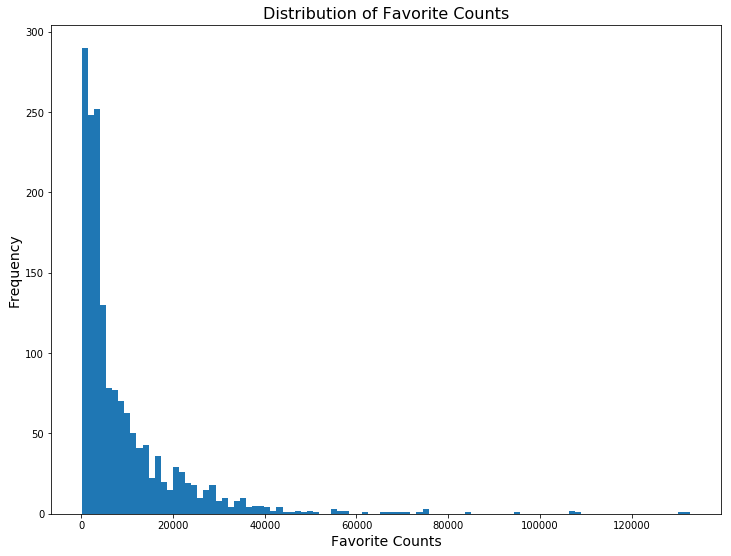

In [75]:
plt.figure(figsize = (12,9))
plt.hist(x = master_dataset.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts',fontsize=16)
plt.xlabel('Favorite Counts',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

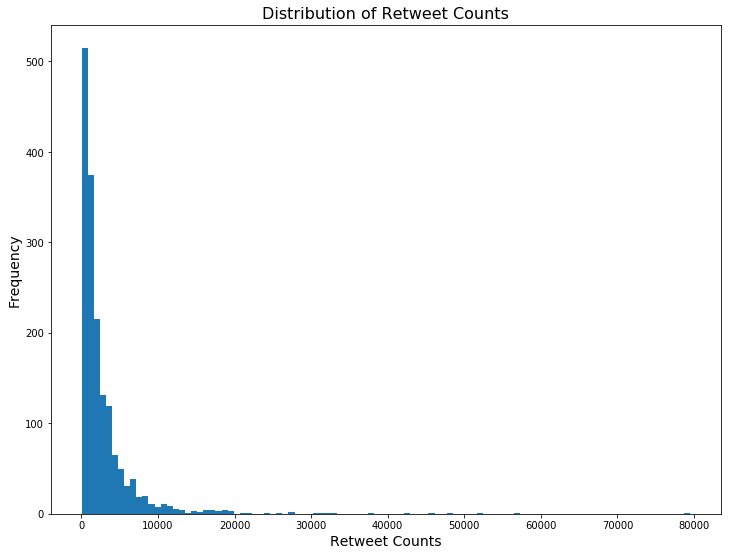

In [76]:
plt.figure(figsize = (12,9))
plt.hist(x = master_dataset.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts',fontsize=16)
plt.xlabel('Retweet Counts',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

In [77]:
# checking the possibility of having the Retweet count greater than 
master_dataset[master_dataset['retweet_count'] > master_dataset['favorite_count']]

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,dog_name,dog_stage,favorite_count,retweet_count,...,img_num,predict_1,predict_1_conf,predict_1_dog,predict_2,predict_2_conf,predict_2_dog,predict_3,predict_3_conf,predict_3_dog


#### Plotting the distributions of `favorite_count` and `retweet_count` showed that both distributions are right skewed. At first glance , they look pretty similar but checking the breaks on the X-axis of both plots, clearly indicates that  favorite_count  is always  higher than  retweet_count . However , it is important to know  that although  there might be an exception  to every rule, In our case THERE IS NO EXCEPTIONS .

## Second Insight:  The Team Managing `WeRateDogs` Account is Accessing Their Account, Mostly, Through Their iPhone Twitter App

Twitter for iphone    1635
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64


Text(0.5,1,'The Distribution of Source')

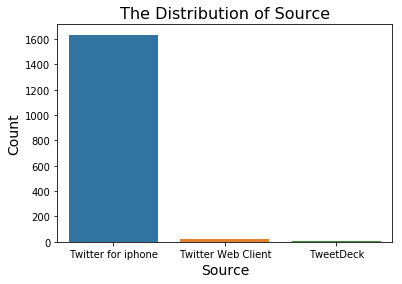

In [78]:
sorted_source = master_dataset['source'].value_counts().index
print(master_dataset['source'].value_counts())
sns.countplot(x="source", data=master_dataset, order = sorted_source)
sns.set(style="darkgrid")
plt.xlabel('Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

#### The above plot presents the distribution of source. We can see clearly the dominate source of  `WeRateDogs` tweets have been tweeted through iPhone twitter app. We can see that the source of more than 98% of tweets is "Twitter for iphone". That means that the iphone twitter app is the main channel for people managing the Twitter user @dog_rates  using to tweet, while the TweetDeck is pretty rare to be used (less than 1%).

##  Third Insight: A Dog Rating of 13/10 was given to the Top 5 favorite tweets, and the Top 5 retweeted tweets. (Interesting ?? huh!! )


In [79]:
# Top 5 Favorite Tweets
master_dataset.sort_values('favorite_count', ascending=False)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head()

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
306,822872901745569793,NaN,puppo,132810,48265,13
769,744234799360020481,NaN,doggo,131075,79515,13
58,879415818425184262,Duddles,,107956,45849,13
397,807106840509214720,Stephan,,107015,56625,13
108,866450705531457537,Jamesy,pupper,106827,32883,13


In [80]:
# Top 5 retweeted Tweets
master_dataset.sort_values('retweet_count', ascending=False)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head()

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
769,744234799360020481,NaN,doggo,131075,79515,13
397,807106840509214720,Stephan,,107015,56625,13
804,739238157791694849,NaN,doggo,75163,52360,13
306,822872901745569793,NaN,puppo,132810,48265,13
58,879415818425184262,Duddles,,107956,45849,13


In [81]:
master_dataset.rating_out_of_10.value_counts(sort=True, ascending=False).head(5)

12    424
10    360
11    357
13    221
9     133
Name: rating_out_of_10, dtype: int64

#### What is more interesting is that: after checking the list of top 5 most frequent ratings, the rating (13/10) took the fourth place on that list , with only 221 dogs. This might indicate a weak relationship between the `rating_out_of_10` and both  `favorite_count` and `retweet_count` .

###  Let's check their Correlation by calculating the Correlation Coeffient 

In [82]:
np.corrcoef(master_dataset.rating_out_of_10,master_dataset.favorite_count)[0][1]

0.37833239831826021

In [83]:
np.corrcoef(master_dataset.rating_out_of_10,master_dataset.retweet_count)[0][1]

0.28108475558494211

#### The correlation coeffient  values indicate WEAK relationships between `rating_out_of_10` and both  `favorite_count` and `retweet_count`. However, plotting these relationships  will surely confirm the existence of this WEAK relationship.

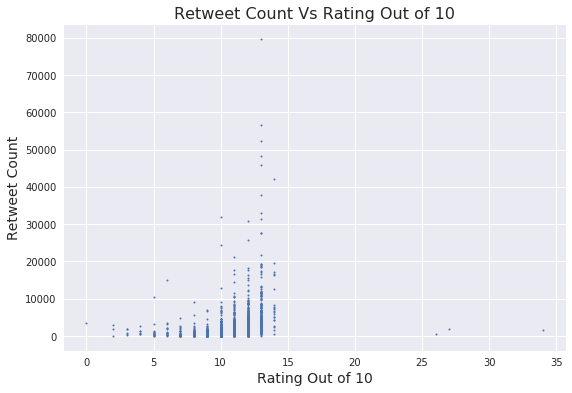

In [84]:
plt.figure(1, figsize = (9,6))
plt.plot(master_dataset.rating_out_of_10,master_dataset.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Retweet Count Vs Rating Out of 10',fontsize=16)
plt.xlabel('Rating Out of 10',fontsize=14)
plt.ylabel('Retweet Count',fontsize=14)
plt.show()

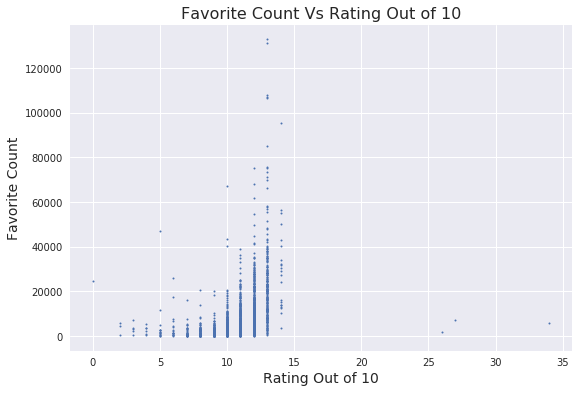

In [89]:
plt.figure(1, figsize = (9,6))
plt.plot(master_dataset.rating_out_of_10,master_dataset.favorite_count, marker='o', linestyle='', ms=2 )
plt.title('Favorite Count Vs Rating Out of 10',fontsize=16)
plt.xlabel('Rating Out of 10',fontsize=14)
plt.ylabel('Favorite Count',fontsize=14)
plt.show()

##### And here we are again, with two scatter plots showing Weak Relationships between the `rating_out_of_10` and both `favorite_count` and `retweet_count`. So as a conclusion , we have now a strong evident that having a high/low rating is now associated in any way with the tweet having high/low favourite/retweet count.

## A Final and Very Interesting Insight: The tweet with the dog that got the least rating among all others (0/10), has been favorited more than the one with the top rated dog,who got (34/10)

In [86]:
# Top rated dog
master_dataset.sort_values('rating_out_of_10', ascending=False)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head(1)

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
382,810984652412424192,Sam,,5927,1655,34


In [87]:
# least rated dog
master_dataset.sort_values('rating_out_of_10', ascending=True)[['tweet_id','dog_name','dog_stage','favorite_count','retweet_count','rating_out_of_10']].head(1)

,tweet_id,dog_name,dog_stage,favorite_count,retweet_count,rating_out_of_10
232,835152434251116546,NaN,,24574,3443,0


##### I don't know what is the reason of that high favorite count for the tweet of that poor little dog. I am wondering !! .. One possible reason is : these  likes might mean that people are agreeing with the rating (0/10) or they might be liking this tweet to send `WeRateDogs` team a hidden meassage that :"Even if that POOR LITTLE Dog is UNDER RATED, we are still liking him".